In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Conv1D,MaxPooling1D , Conv2D,MaxPooling2D
from keras.layers import LSTM,Dropout
from keras.layers.embeddings import Embedding
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
import warnings
warnings.filterwarnings('ignore')
from tensorflow.keras.callbacks import TensorBoard
import nltk 

from nltk.tokenize import sent_tokenize, word_tokenize
import time
from sklearn.feature_extraction.text import CountVectorizer

Name = "Grpah-2300-100"

tensorboard = TensorBoard(log_dir='Logs2/{}'.format(Name))
print(Name)

Grpah-2300-100


In [5]:
news_data = pd.read_csv("Normalized_Dataset.csv", header=None, skipinitialspace=True ,skiprows=1, encoding='utf-8') 
# print a summary of the data in news_data
print(news_data[1])
news_data[1] = news_data[1].replace(['1-Septic', '0-Pure'], [1, 0])
news_data[0] = news_data[0].replace('\n', '', regex=True).str.strip()
news_data.head(20)


0      1
1      1
2      1
3      1
4      1
      ..
993    0
994    0
995    0
996    0
997    0
Name: 1, Length: 998, dtype: object


,0,1
0,"In Congress, it’s a problem of plenty with too...",1
1,"The party leadership, mainly PM Narendra Modi ...",1
2,Speculations are rife in party circles that he...,1
3,Not all is well in the Congress too. Following...,1
4,Senior Congress functionaries are particularly...,1
5,A lively debate in the Rajya Sabha on Wednesda...,1
6,"The Upper House debate, the first discussion o...",1
7,MPs cutting across party lines also insisted d...,1
8,A source said it mentions Nepal has a geograph...,1
9,Sources said this was announced by the Nepal g...,1


In [6]:
take_data=[]
for i in range(50 , 100):
    if news_data[1][i] == 1:
        take_data.append(news_data[0][i])
take_data        


[]

In [7]:
news_data[1].value_counts()

0    499
1    498
0      1
Name: 1, dtype: int64

In [8]:
X = news_data[0].values
Y = news_data[1].values
print(X.shape)
x_train ,  x_test ,y_train ,  y_test = train_test_split(X , Y  , test_size = 0.05)
print(x_train.shape , y_train.shape)
# print((x_train))

(998,)
(948,) (948,)


In [10]:
tokenizer = Tokenizer(num_words=None) #adding this parameter can  responsible for setting the size of the vocabulary i.e the most common num_words
tokenizer.fit_on_texts(x_train)

print(x_train)

['His electoral performance has been, however, poor as his party could win only one seat in the 2015 assembly polls as a BJP ally and drew a blank in the 2019 Lok Sabha elections as a RJD-Congress ally.'
 'Those who denounced the letter writers in the "Group of 23" like Nirmal Khatri and Naseeb Pathan have interestingly found places in the panels announced by Gandhi on Sunday evening.'
 'The question papers for Calcutta University undergraduate final year and terminal semester examinations, that will be held in digital mode, will not be sent over WhatsApp as was decided earlier.'
 'I expected it to be tough, but it turned out to be an easy paper.'
 'His remarks came after he forwarded the resignation of Akali Dal’s Harsimrat Kaur Badal as minister for food processing and amid Congress’s effort to step up its opposition to the troika of bills meant to reform trade in farm produce.'
 'The timetable would be posted on the university website in a couple of days.'
 'Despite the raging coron

In [11]:
vocab_size = len(tokenizer.word_index) + 1  

data = []
punc = '.'
for i in x_train:
    i = i[:-1]
    token = word_tokenize(i)
    if punc in token:
        for index ,val in enumerate(token):
            if punc == val:
                token.pop(index) 
#     x_train = tokenizer.texts_to_sequences(token)           
    data.append(token)

x_train = tokenizer.texts_to_sequences(data) 
x_test = tokenizer.texts_to_sequences(x_test)

In [12]:
maxlen = 100
x_train = pad_sequences(x_train, padding='post', maxlen=maxlen)
x_test = pad_sequences(x_test, padding='post', maxlen=maxlen)
print(x_train)
news_data.info()

[[  31 1538  883 ...    0    0    0]
 [ 235   27 1540 ...    0    0    0]
 [   1  392  886 ...    0    0    0]
 ...
 [2468  712   16 ...    0    0    0]
 [   1  224 5473 ...    0    0    0]
 [1094    3 5475 ...    0    0    0]]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       998 non-null    object
 1   1       998 non-null    object
dtypes: object(2)
memory usage: 15.7+ KB


In [13]:
y_train = np.array(y_train)
print(x_train.shape , vocab_size)
print(x_train)
y_train = y_train.astype('float64')

(948, 100) 5481
[[  31 1538  883 ...    0    0    0]
 [ 235   27 1540 ...    0    0    0]
 [   1  392  886 ...    0    0    0]
 ...
 [2468  712   16 ...    0    0    0]
 [   1  224 5473 ...    0    0    0]
 [1094    3 5475 ...    0    0    0]]


In [14]:
from keras import layers

model = Sequential()

model.add(layers.Embedding(vocab_size, 100, input_length=maxlen))
model.add(layers.Conv1D(16, 5, activation='relu'))

model.add(layers.GlobalMaxPooling1D())

model.add(layers.Dense(10, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train,epochs=50,batch_size=10 , validation_split=0.1 , callbacks= [tensorboard])

Epoch 1/50
86/86 [==============================] - 7s 36ms/step - loss: 0.6934 - accuracy: 0.5105 - val_loss: 0.6950 - val_accuracy: 0.4105
Epoch 2/50
86/86 [==============================] - 1s 16ms/step - loss: 0.6581 - accuracy: 0.5602 - val_loss: 0.6757 - val_accuracy: 0.5579
Epoch 3/50
86/86 [==============================] - 1s 16ms/step - loss: 0.4930 - accuracy: 0.9402 - val_loss: 0.6501 - val_accuracy: 0.6000
Epoch 4/50
86/86 [==============================] - 2s 18ms/step - loss: 0.2034 - accuracy: 0.9837 - val_loss: 0.6468 - val_accuracy: 0.6947
Epoch 5/50
86/86 [==============================] - 1s 17ms/step - loss: 0.0765 - accuracy: 0.9855 - val_loss: 0.6581 - val_accuracy: 0.7053
Epoch 6/50
86/86 [==============================] - 1s 17ms/step - loss: 0.0522 - accuracy: 0.9850 - val_loss: 0.6660 - val_accuracy: 0.6947
Epoch 7/50
86/86 [==============================] - 1s 16ms/step - loss: 0.0529 - accuracy: 0.9756 - val_loss: 0.6734 - val_accuracy: 0.7158
Epoch 8/50
86

In [15]:
y_test = y_test.astype('float64')
acc , y = model.evaluate(x_test , y_test)

7/7 [==============================] - 0s 5ms/step - loss: 0.2212 - accuracy: 0.9378


In [16]:
print(y_test)

[1. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0.
 1. 0. 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0.
 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0.]


In [17]:
def mapper(a):
    a = tokenizer.texts_to_sequences(a)
    return pad_sequences(a, padding='post', maxlen=maxlen)


x_eval = mapper(['he said, "the world goes round and round and round"',
        'Even Bangladesh leader Khaleda Zia has said the terrorists are being trained in India and sent to Bangladesh to create disturbance'])

y_eval = np.array([0, 1])
model.evaluate(x_eval, y_eval)

for i in model.predict(x_eval):
    print(round(i[0]))

1/1 [==============================] - 0s 179ms/step - loss: 1.8399 - accuracy: 0.5000
1
1


In [18]:
y_pred = model.predict(x_test)
y_pred = [round(i[0]) for i in y_pred]

In [19]:
from sklearn.metrics import confusion_matrix
y = confusion_matrix(y_test, y_pred)
print(y)

[[107   5]
 [  8  89]]


<AxesSubplot:>

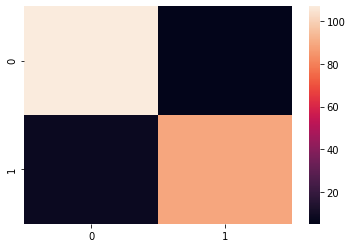

In [20]:
import seaborn as sns

sns.heatmap(y)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 100)          548100    
_________________________________________________________________
conv1d (Conv1D)              (None, 96, 16)            8016      
_________________________________________________________________
global_max_pooling1d (Global (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                170       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 11        
Total params: 556,297
Trainable params: 556,297
Non-trainable params: 0
_________________________________________________________________
